# Tutorial : How to use the genetic algorithm

In [1]:
from graphs import Graph
G = Graph(6)    # G.nb_nodes = 6, G.s = 0 et G.t = 5

In [2]:
# Add edges (u,v,a,b) sequentially (the order is not important)
G.add_edge(0,1,5,1)
G.add_edge(0,2,5,5)
G.add_edge(1,2,5,1)
G.add_edge(2,4,8,1)
G.add_edge(1,3,5,7)
G.add_edge(3,5,5,2)
G.add_edge(4,3,5,2)
G.add_edge(4,5,5,9)

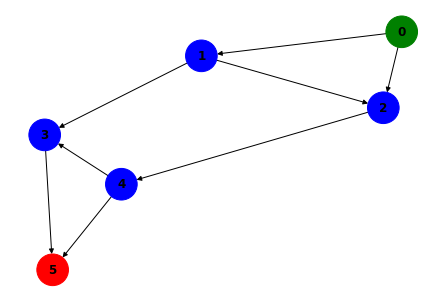

In [3]:
G.visualize_graph() #visualize the graph without any weights (TODO : add (a,b) as edge labels)

In [4]:
from algo_gen import Genom, Population
P = Population(G, 20)  # Population initalization on graph G, P.nb_ind = 20

## Cross-over test

In [5]:
Bob = P.pop[0]
Alice = P.pop[1]
print("Bob :", Bob.weights)
print("Alice :", Alice.weights)

Bob : [0.13056324923395735, 0.8322140912628744, 0.7419003340275901, 0.13689023191218896, 0.8127993096599968, 0.3863932677231928, 0.6705137716504711, 0.7526437845217365]
Alice : [0.5855722711112661, 0.44937776416917585, 0.5414058501765662, 0.06334368896472187, 0.9831660605901793, 0.3666777262570309, 0.10225389040538768, 0.31848609619087076]


In [6]:
Carl = Bob.cross_over(Alice)
print("Carl :", Carl.weights)

Carl : [0.13056324923395735, 0.8322140912628744, 0.7419003340275901, 0.13689023191218896, 0.9831660605901793, 0.3666777262570309, 0.10225389040538768, 0.7526437845217365]


In [7]:
print(G.out_edges_weighted(0, Bob))

{0 -> 1: 0.13056324923395735, 0 -> 2: 0.8322140912628744}


## Find the most efficient path (without congestion)

In [8]:
print(G.eval_simple(Bob))

12.13


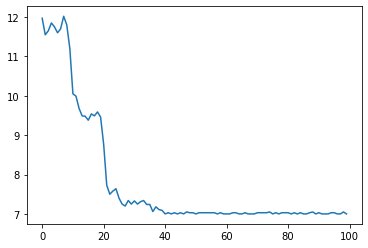

In [13]:
# %matplotlib notebook
sp = P.train(100, congestion = False)

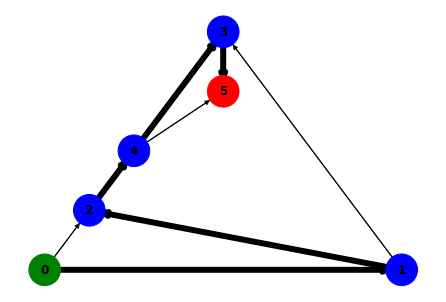

In [14]:
best_individual = sp[0]
G.visualize_genom(best_individual, label = False)

## Find the most efficient distribution (with congestion)

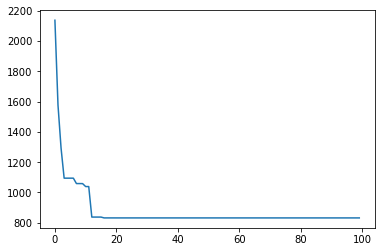

In [15]:
sp = P.train(100, congestion = True)

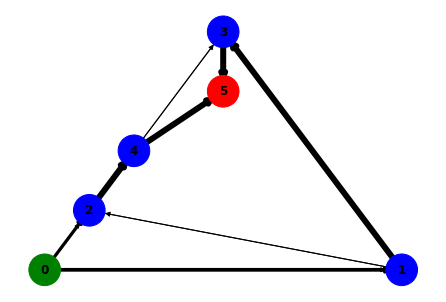

In [16]:
best_individual = sp[0]
G.visualize_genom(best_individual, label = False)

In [11]:
paths = G.all_path()
print(paths)

[[0 -> 1, 1 -> 3, 3 -> 5], [0 -> 2, 2 -> 4, 4 -> 5], [0 -> 1, 1 -> 2, 2 -> 4, 4 -> 5], [0 -> 2, 2 -> 4, 4 -> 3, 3 -> 5], [0 -> 1, 1 -> 2, 2 -> 4, 4 -> 3, 3 -> 5]]


In [12]:
best_individual.evaluate_congestion(G) 

831.633707168385